# Chapter 17: Data Science Tools and Technologies
## Section 17.2 — The Role of Jupyter Notebooks in Data Science

This notebook demonstrates a typical data science workflow inside a Jupyter Notebook, showcasing how code, visualizations, and narrative text combine in a single interactive document.

## Cell 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Generate synthetic customer churn dataset
np.random.seed(42)
n = 1000

df = pd.DataFrame({
    'tenure_months': np.random.randint(1, 72, n),
    'monthly_charges': np.random.uniform(20, 100, n).round(2),
    'support_calls': np.random.poisson(3, n),
    'data_usage_gb': np.random.uniform(1, 50, n).round(1),
    'contract_annual': np.random.choice([0, 1], n, p=[0.4, 0.6]),
})

# Create target based on features
churn_prob = 1 / (1 + np.exp(-(
    -1.5 + 0.02 * df['monthly_charges'] - 0.03 * df['tenure_months']
    + 0.2 * df['support_calls'] - 0.8 * df['contract_annual']
)))
df['churned'] = (churn_prob > 0.5).astype(int)

print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (1000, 6)


,tenure_months,monthly_charges,support_calls,data_usage_gb,contract_annual,churned
0,52,88.46,3,48.0,1,0
1,15,86.42,3,42.7,1,0
2,61,51.77,2,43.3,1,0
3,21,73.45,1,20.9,0,0
4,24,36.40,4,38.4,0,0


## Cell 2: Quick Exploratory Data Analysis

In [2]:
print('Summary Statistics:')
print(df.describe().round(2))
print(f'\nChurn rate: {df["churned"].mean()*100:.1f}%')
print(f'Missing values: {df.isnull().sum().sum()}')

Summary Statistics:
       tenure_months  monthly_charges  support_calls  data_usage_gb  \
count        1000.00          1000.00        1000.00        1000.00   
mean           35.49            60.41           2.96          25.28   
std            20.71            23.45           1.67          14.19   
min             1.00            20.40           0.00           1.10   
25%            17.00            39.23           2.00          12.90   
50%            35.00            61.44           3.00          25.05   
75%            54.00            80.83           4.00          38.10   
max            71.00            99.95           9.00          50.00   

       contract_annual  churned  
count          1000.00  1000.00  
mean              0.59     0.09  
std               0.49     0.29  
min               0.00     0.00  
25%               0.00     0.00  
50%               1.00     0.00  
75%               1.00     0.00  
max               1.00     1.00  

Churn rate: 9.4%
Missing values: 

## Cell 3: Visualize Key Distributions

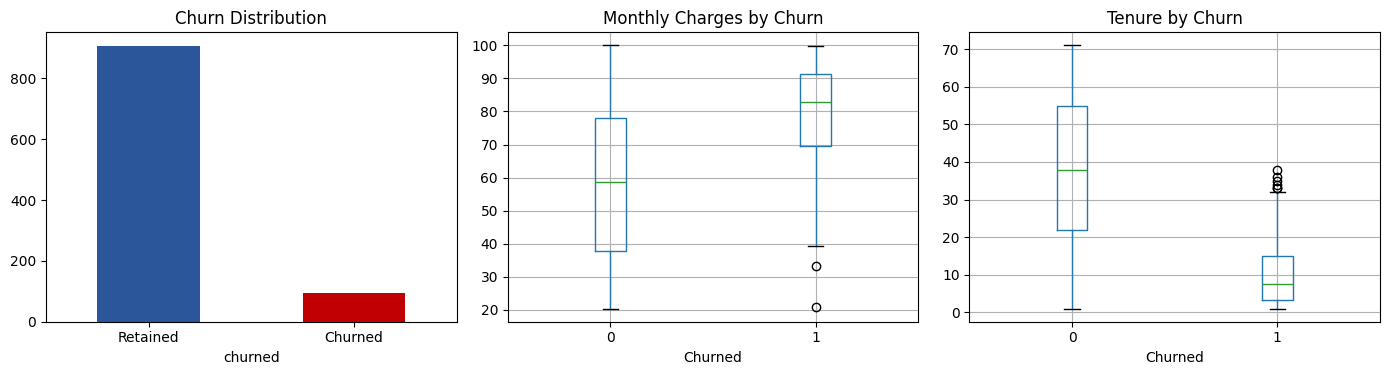

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Churn distribution
df['churned'].value_counts().plot(kind='bar', ax=axes[0], color=['#2B579A', '#C00000'])
axes[0].set_title('Churn Distribution')
axes[0].set_xticklabels(['Retained', 'Churned'], rotation=0)

# Monthly charges by churn status
df.boxplot(column='monthly_charges', by='churned', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn')
axes[1].set_xlabel('Churned')
plt.suptitle('')  # Remove auto-title

# Tenure by churn status
df.boxplot(column='tenure_months', by='churned', ax=axes[2])
axes[2].set_title('Tenure by Churn')
axes[2].set_xlabel('Churned')
plt.suptitle('')

plt.tight_layout()
plt.show()

## Cell 4: Train a Random Forest Classifier

In [4]:
# Prepare features and target
X = df.drop('churned', axis=1)
y = df['churned']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Train set: {X_train.shape[0]} samples')
print(f'Test set:  {X_test.shape[0]} samples')

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f'\nAccuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'\n{classification_report(y_test, y_pred, target_names=["Retained", "Churned"])}')

Train set: 800 samples
Test set:  200 samples

Accuracy: 0.9750

              precision    recall  f1-score   support

    Retained       0.97      1.00      0.99       181
     Churned       1.00      0.74      0.85        19

    accuracy                           0.97       200
   macro avg       0.99      0.87      0.92       200
weighted avg       0.98      0.97      0.97       200



## Cell 5: Feature Importance Analysis

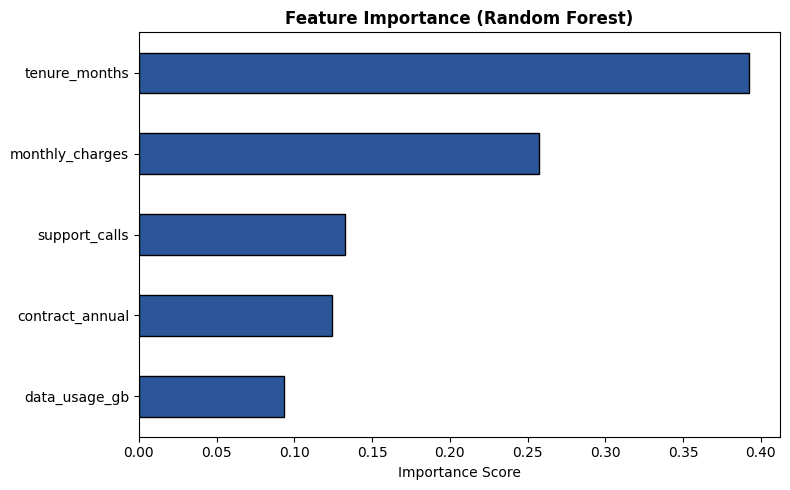


Top predictors of churn:
  tenure_months        0.3927
  monthly_charges      0.2575
  support_calls        0.1324
  contract_annual      0.1241
  data_usage_gb        0.0933


In [5]:
# Feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=True)

plt.figure(figsize=(8, 5))
importance.plot(kind='barh', color='#2B579A', edgecolor='black')
plt.title('Feature Importance (Random Forest)', fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print('\nTop predictors of churn:')
for feat, imp in importance.sort_values(ascending=False).items():
    print(f'  {feat:<20} {imp:.4f}')

## Summary

This notebook demonstrated the core advantages of Jupyter Notebooks for data science:

1. **Iterative exploration** — each cell builds on the previous, allowing step-by-step analysis
2. **Inline visualizations** — plots appear directly below the code that generates them
3. **Documentation alongside code** — markdown cells explain the reasoning and findings
4. **Reproducibility** — running all cells top-to-bottom reproduces the entire analysis